In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

### Gradient Boosting

In [ ]:
### Генерим датасет

from sklearn.datasets import make_moons

dataset = make_moons(n_samples=1000,
                     noise=0.5,
                     random_state=0)

dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))),
                       columns=["x1", "x2", "y"])

dataset.head()

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0


In [ ]:
dataset['y'].value_counts()

,count
y,
1.0,500
0.0,500


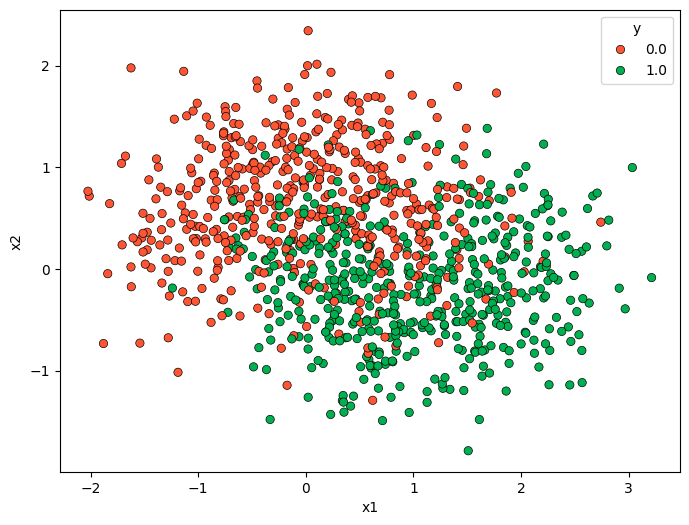

In [ ]:
### Изобразим объекты и раскрасим их в классы

import seaborn as sns

fig = plt.figure()

fig.set_size_inches(8, 6)

sns.scatterplot(x="x1",
                y="x2",
                hue="y",
                edgecolor="k",
                palette=["#FF5533", "#00B050"],
                data=dataset)

plt.show()

In [ ]:
### Разобьем датасет на объекты и таргеты

X = dataset.drop("y", axis=1)
y = dataset["y"]

### Разделим на трейн и тест

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    test_size=0.2)


In [ ]:
### Обучим градиентный бустинг над деревьями

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

model = GradientBoostingClassifier(learning_rate=1,
                                   max_depth=2,
                                   n_estimators=500)

model

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=500)

In [ ]:
def learn_boosting_and_plot(estimator=model,
                            X_tr=X_train,
                            X_te=X_test,
                            Y_tr=y_train,
                            Y_te=y_test):

    pixel_step = 0.02

    X = pd.concat((X_tr, X_te))
    Y = pd.concat((Y_tr, Y_te))

    x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

    ### Генерим много-много точек на плоскости

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, pixel_step),
        np.arange(x2_min, x2_max, pixel_step)
    )


    ### Обучаем модель на трейне

    estimator.fit(X_tr, Y_tr)

    ### Считаем качество на обоих фолдах

    accuracy_train = estimator.score(X_tr, Y_tr)
    accuracy_test = estimator.score(X_te, Y_te)

    ### Для каждой точки даем прогноз, чтобы покрыть поверхности

    Z = estimator.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    ### Заполняем пространство

    cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

    plt.axis("tight")

    ### Рисуем точечки и обученные области

    for i, n, c in zip(range(2), model.classes_, ["#FF5533", "#00B050"]):
        idx = np.where(y == i)
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
            label="Class %s" % n,
        )
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.legend(loc="upper right")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Boosting with {estimator.n_estimators} estimators")

    return accuracy_train, accuracy_test

(1.0, 0.755)

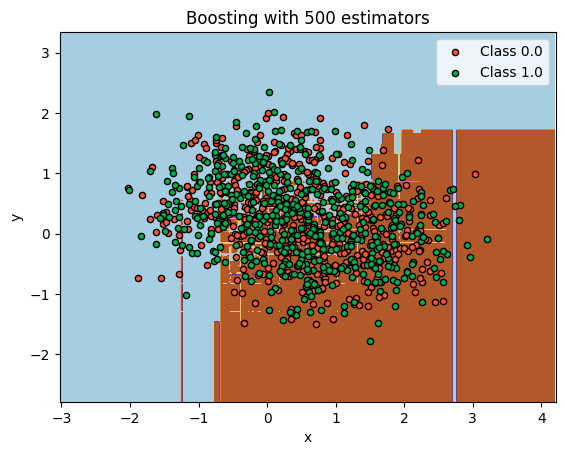

In [ ]:
learn_boosting_and_plot(model)

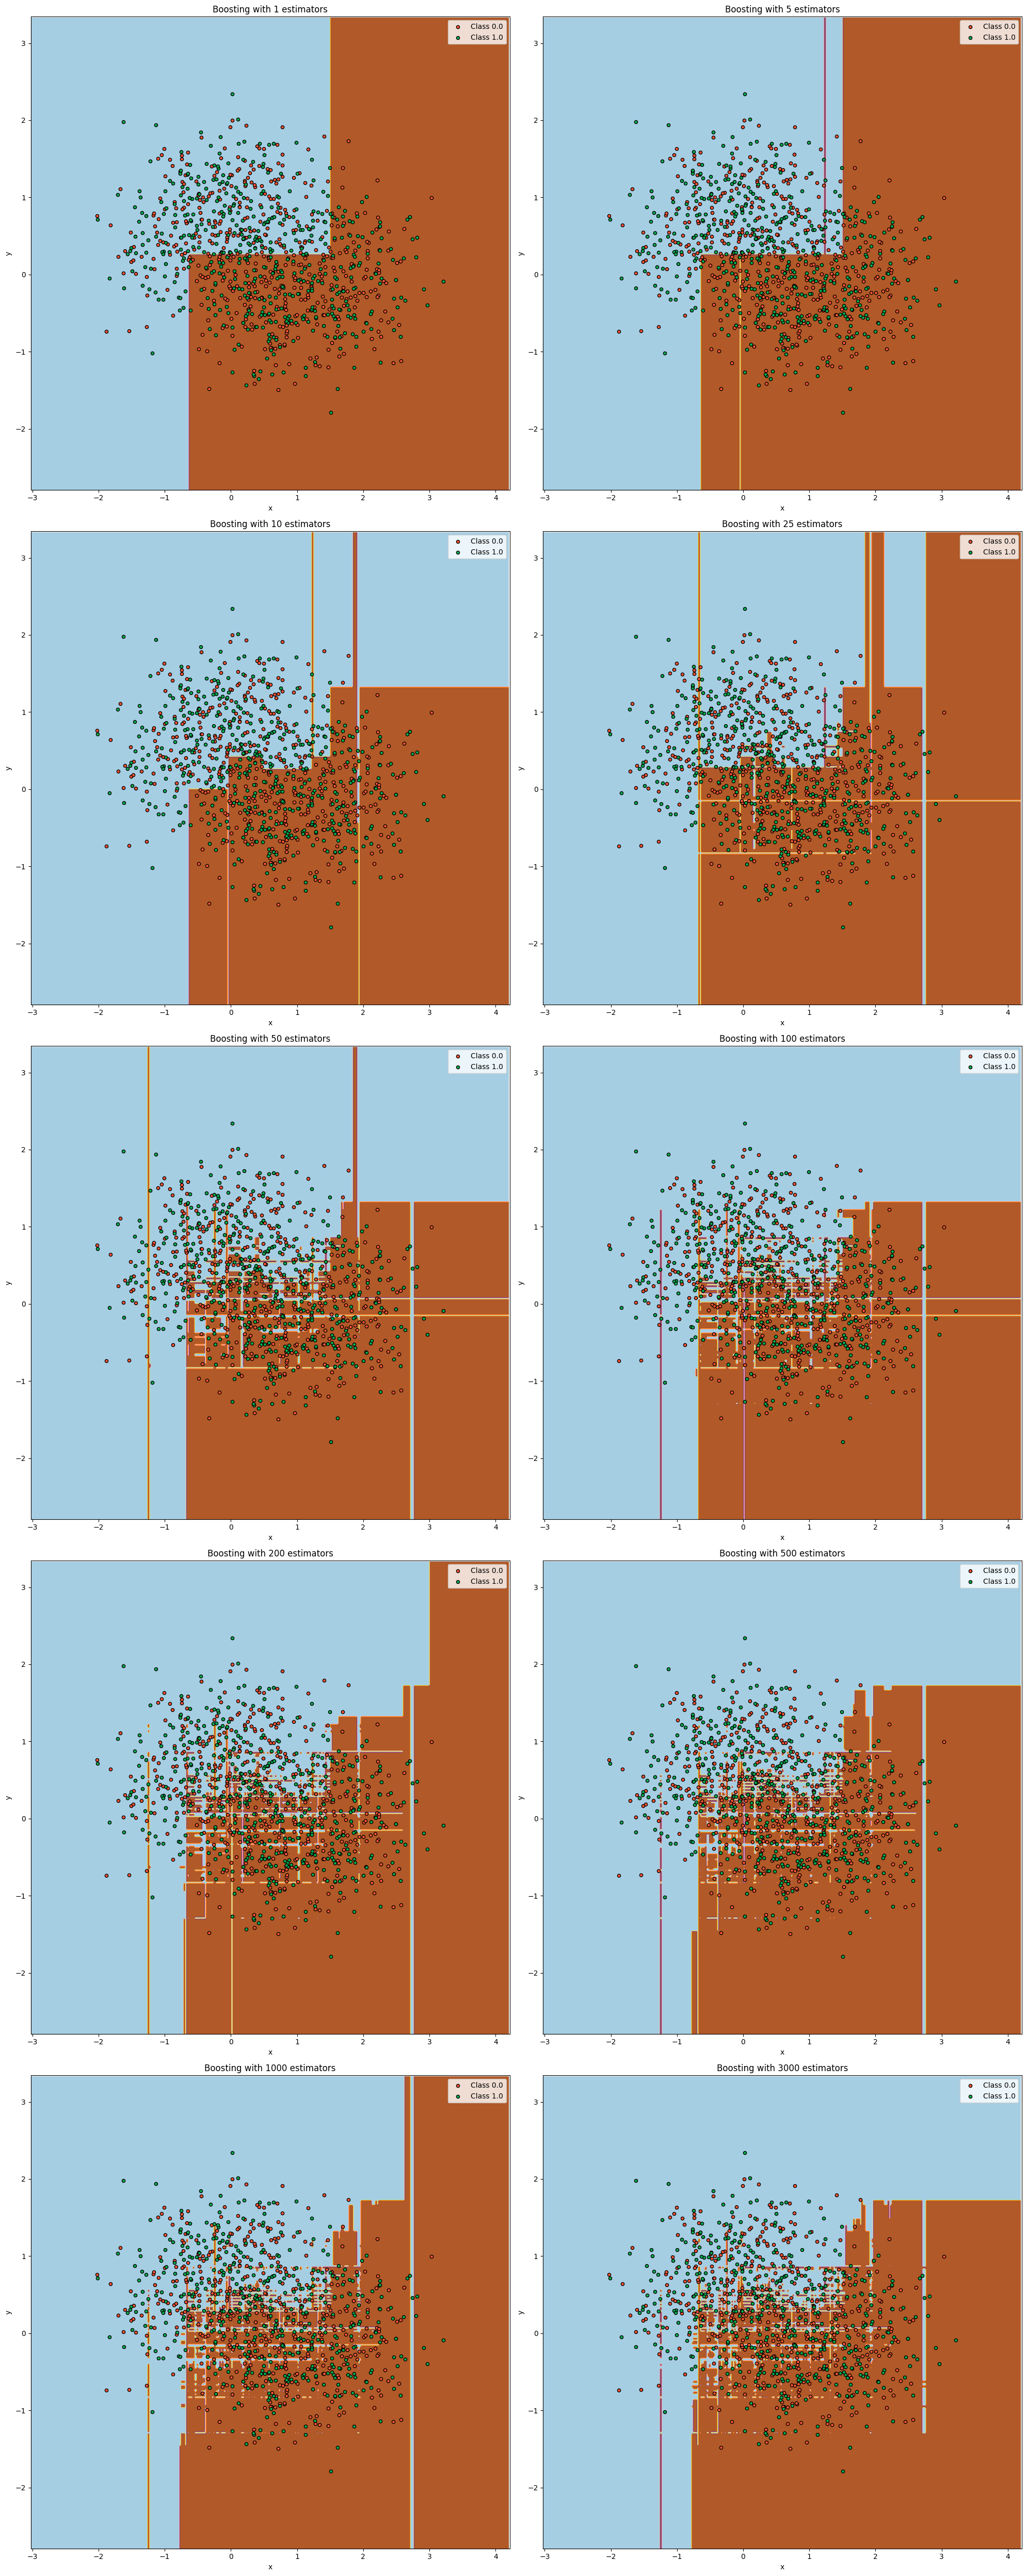

In [ ]:
estimators_num = [1, 5, 10, 25, 50, 100, 200, 500, 1000, 3000]

fig = plt.figure()
fig.set_size_inches(20, 50)

train_accuracies = []
test_accuracies = []


for i, s in enumerate(estimators_num):

    model.n_estimators = s
    ax_ = fig.add_subplot(5, 2, i+1)

    outputs = learn_boosting_and_plot(model)

    train_accuracies.append(outputs[0])
    test_accuracies.append(outputs[1])

fig.tight_layout()
plt.show()

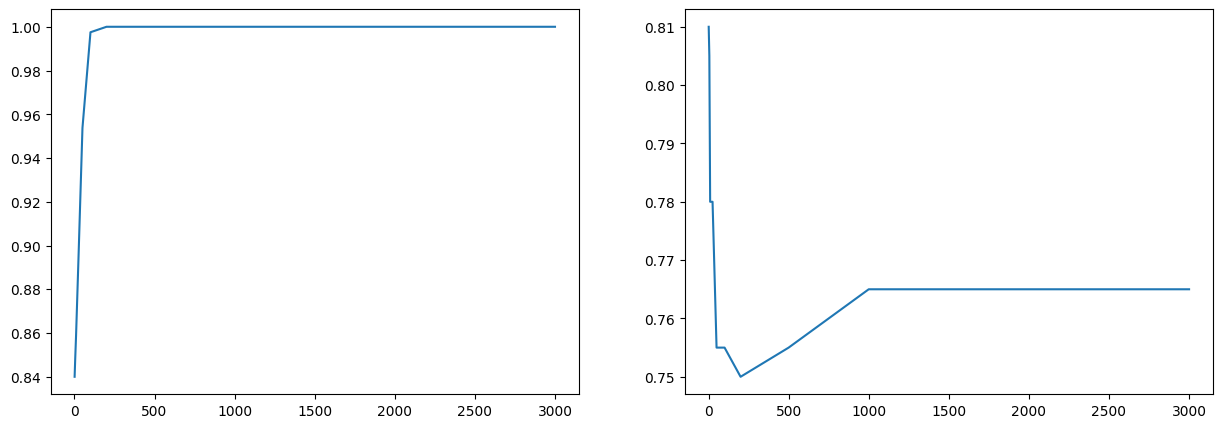

In [ ]:
### Изобразим кривые качества на трейне и тесте

fig = plt.figure()
fig.set_size_inches(15, 5)

ax_1 = fig.add_subplot(1, 2, 1)
plt.plot(estimators_num, train_accuracies)

ax_2 = fig.add_subplot(1, 2, 2)
plt.plot(estimators_num, test_accuracies)

plt.show()

### Поменяем learning_rate и посмотрим, как замедлится композиция!

In [ ]:
### Обучим градиентный бустинг над деревьями

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.5,
                                   max_depth=2,
                                   n_estimators=500)

model

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=500)

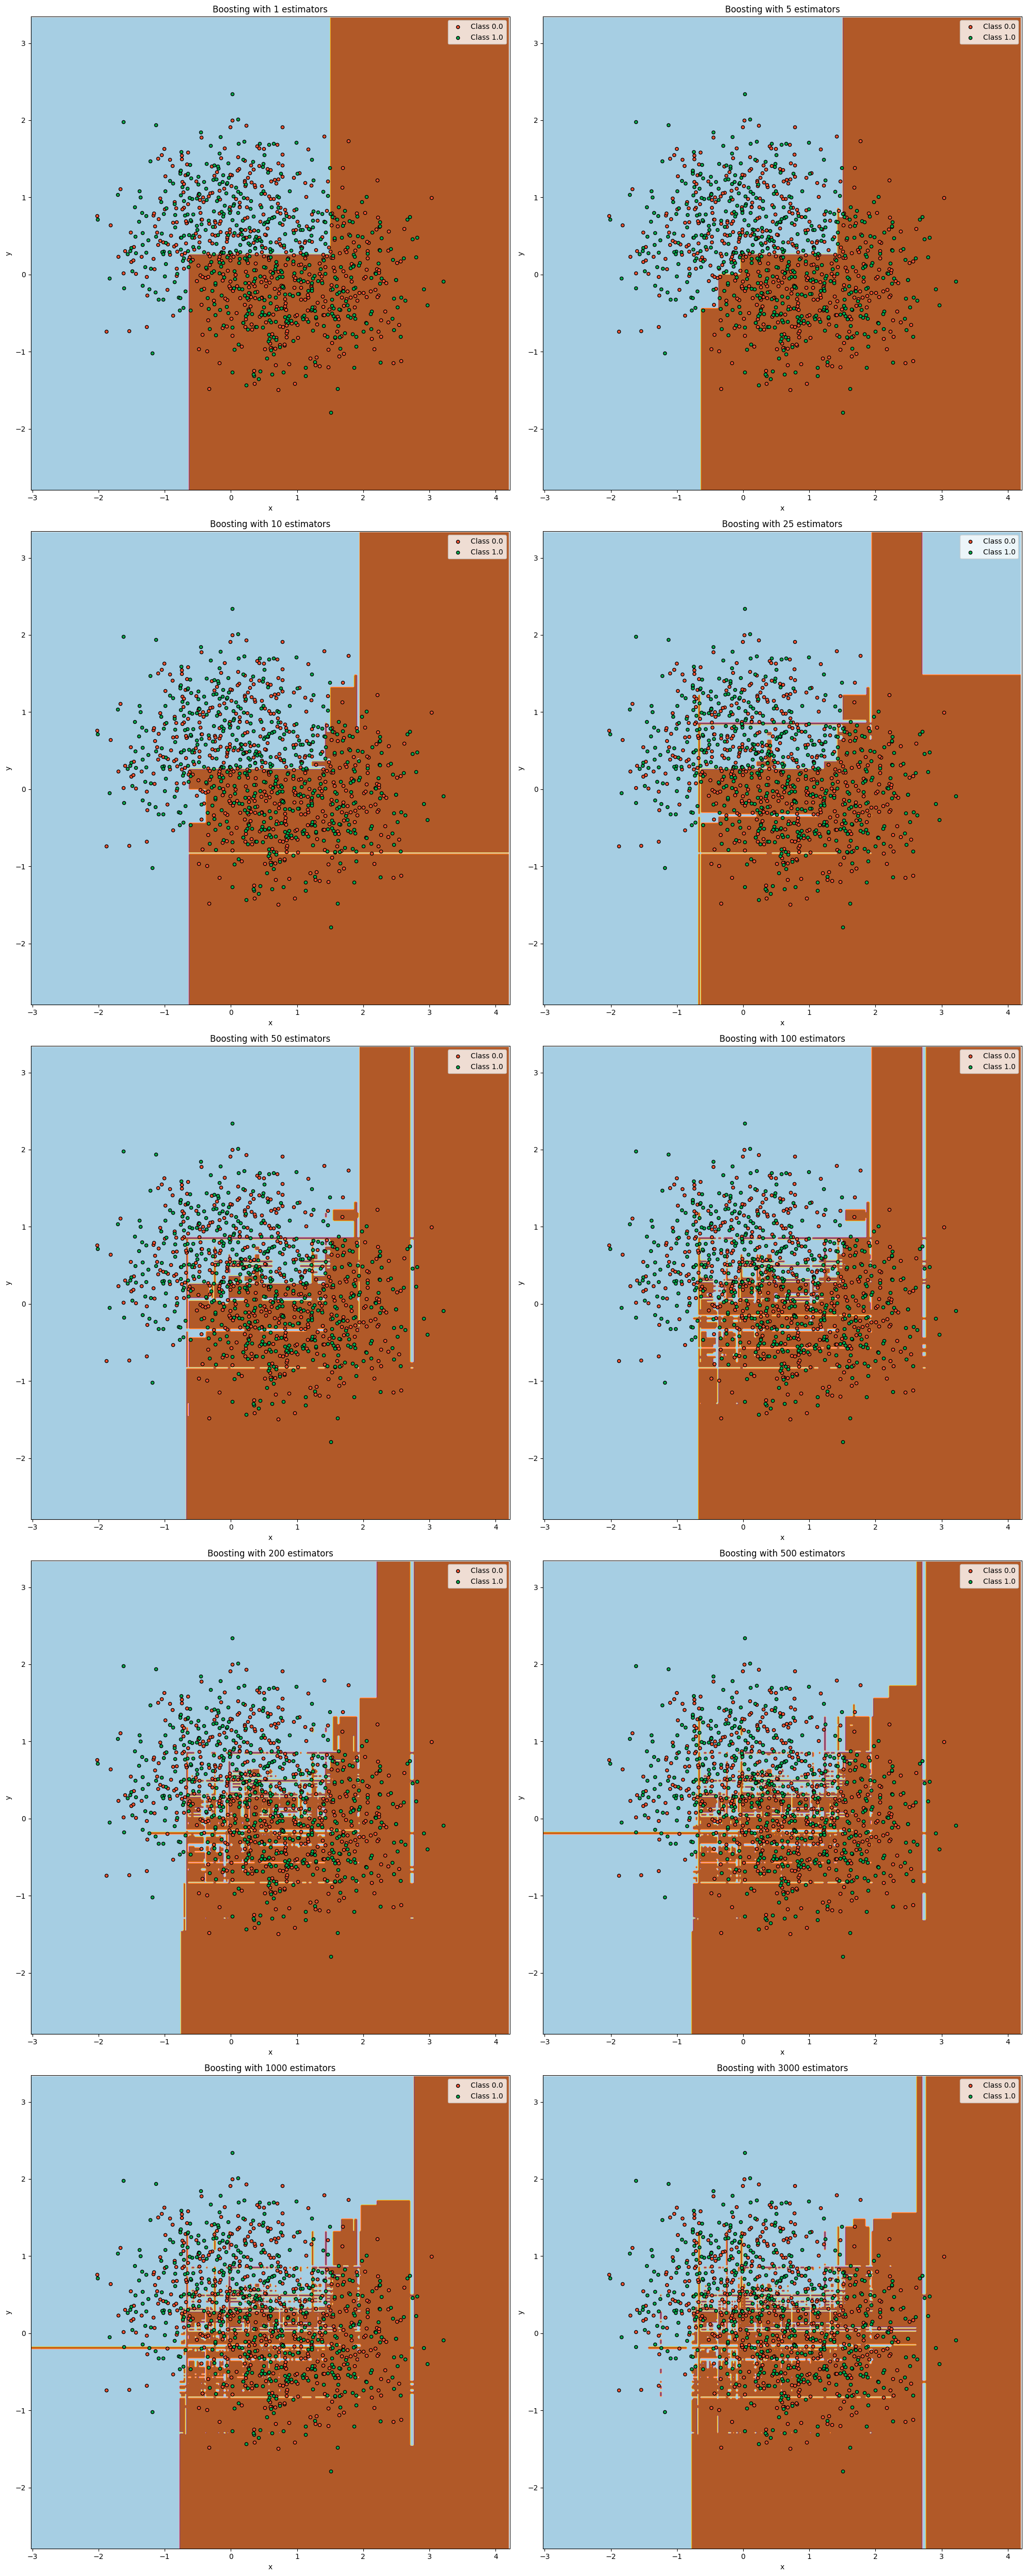

In [ ]:
estimators_num = [1, 5, 10, 25, 50, 100, 200, 500, 1000, 3000]

fig = plt.figure()
fig.set_size_inches(20, 50)

train_accuracies = []
test_accuracies = []


for i, s in enumerate(estimators_num):

    model.n_estimators = s
    ax_ = fig.add_subplot(5, 2, i+1)

    outputs = learn_boosting_and_plot(model)

    train_accuracies.append(outputs[0])
    test_accuracies.append(outputs[1])

fig.tight_layout()
plt.show()

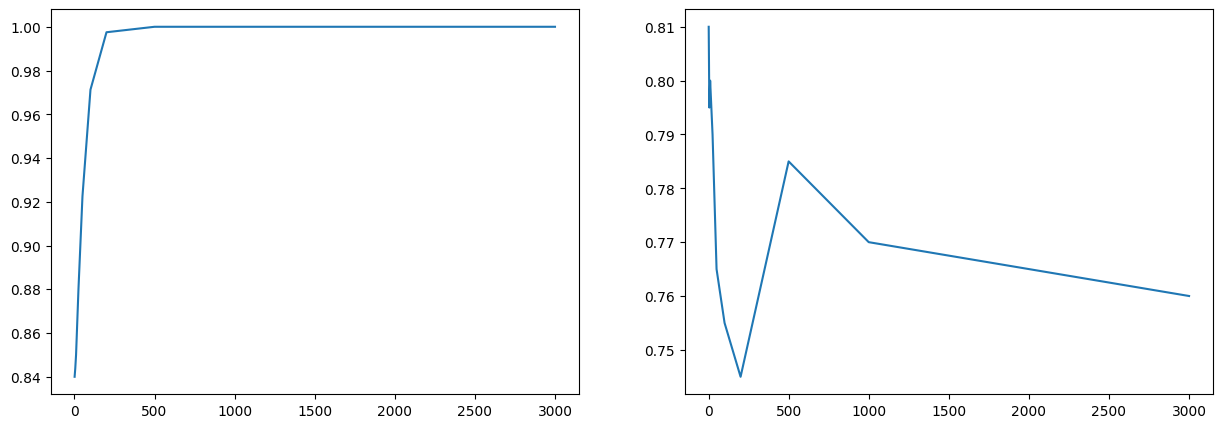

In [ ]:
### Изобразим кривые качества на трейне и тесте

fig = plt.figure()
fig.set_size_inches(15, 5)

ax_1 = fig.add_subplot(1, 2, 1)
plt.plot(estimators_num, train_accuracies)

ax_2 = fig.add_subplot(1, 2, 2)
plt.plot(estimators_num, test_accuracies)

plt.show()

### Популярные реализации градиентного бустинга

### XGboost

$$
\sum_i^n L(y_i, a^{(N-1)}(x_i) + b_N (x_i)) \rightarrow min
$$

Ряд Тейлора:

$$
e^x = 1 + \frac{x}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + ...
$$

Можно применять и в многомерном случае

$$
\sum_i^n L(y_i, a^{(N-1)}(x_i) + b_N (x_i)) \approx \sum_i^n (L(y_i, a^{(N-1)}(x_i)) - s_i \cdot b(x_i) + \frac{1}{2}\cdot h_i \cdot b^2(x_i))
$$

где через $h_i$ обозначены вторые производные по сдвигам

Если вместо $h_i$ положить единички, то получится ровно та задача аппроксимации сдвигов, которую решает обычный градиентный бустинг:

$$
\sum_i^n (b(x_i)-s_i)^2 = \sum_i^n (b^2(x_i) - 2\cdot s_i \cdot b(x_i) + s_i^2) =
$$

$$
\sum_i^n ( - 2\cdot s_i \cdot b(x_i) + b^2(x_i) + s_i^2) = 2 \cdot \sum_i^n (- s_i \cdot b(x_i) + \frac{1}{2} \cdot b^2 (x_i) + \frac{1}{2} + s_i^2)
$$

При оптимизации константы как множитель и как слагаемое можно опустить:

$$
\sum_i^n (- s_i \cdot b(x_i) + \frac{1}{2} \cdot b^2 (x_i)) \rightarrow min
$$

Таким образом, XGboost совершенствует классический градиентный бустинг тем фактом, что при приближении сдвигов новым алгоритмом еще и учитывает вторые производные (кривизну) изначально минимизируемого функционала. Так же в XGboost реализациях обычно учитывается регуляризация деревьев типа

$$
\sum_i^n (- s_i \cdot b(x_i) + \frac{1}{2} \cdot b^2 (x_i)) \cdot h_i + \gamma \cdot J + \frac{\lambda}{2}\cdot \sum_j^J b_j^2 \rightarrow min
$$

Считается самым оптимизированным бустингом: огромное комьюнити, перебор порогов осуществляется с некоторым шагом, а не полным перебором и т.д.

### Catboost

Реализация Яндекса, обладающая рядом особенностей:

1. Симметричные деревья
2. Встроенная обработка категориальных признаков
3. Позволяет строить вершины с большим количеством потомков (например, может классно работать при наличии категорий с большим количеством уникальных значений)
4. Бустрапирует выборку при обучении
5. и т.д.

Наверное, стоит сказать, что это лучшее решение, работающее из коробки без особого подбора гиперпараметров.

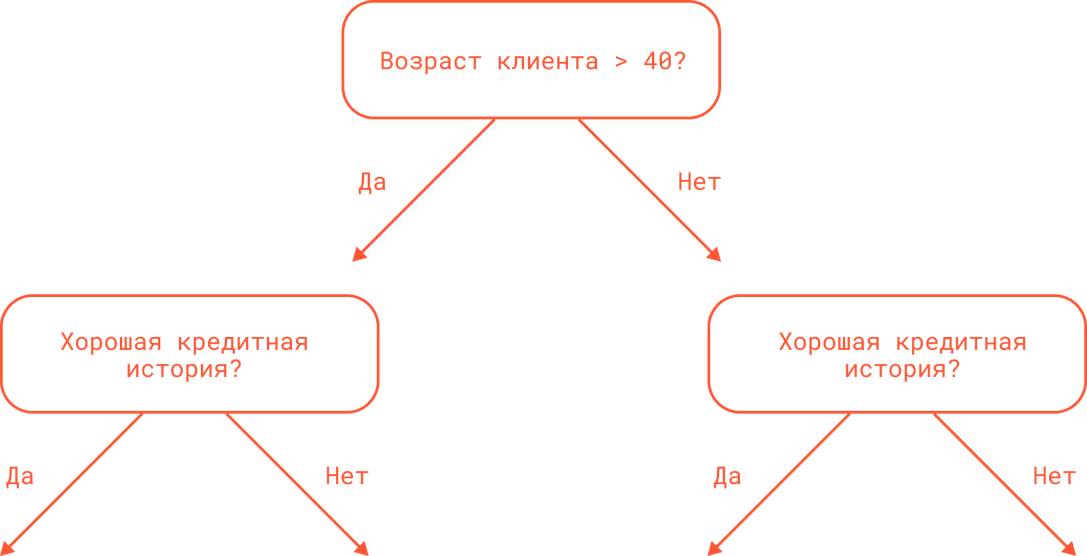

### LightGBM

Разработка Microsoft!

1. С точки зрения работы с категориями, делит их на 2 подгруппы и работает как с бинарной категорией
2. Строит односторонние деревья, из-за чего почти всегда опережает остальные реализации по скорости работы

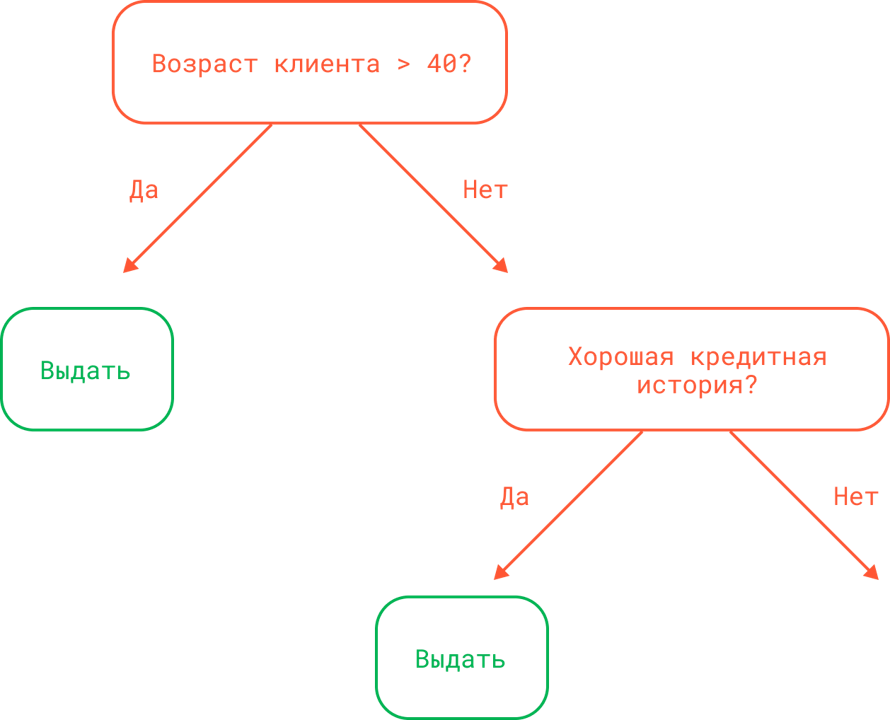

### Бустинг в реальной задаче и сравнение результатов с бэггингом

In [ ]:
df = pd.read_csv('cut_market_info.csv')
X = df.drop("unit_sales", axis=1)
y = df["unit_sales"]

y = y.apply(np.log1p)

X_test, X_train = X[X.date >= '2017-06-01'], X[X.date < '2017-06-01']

y_test, y_train = y[y.index.isin(X_test.index)], y[y.index.isin(X_train.index)]


X_test = X_test.drop('date', axis=1)
X_train = X_train.drop('date', axis=1)
X = X.drop('date', axis=1)

object_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'month',
               'city', 'state', 'type', 'cluster', 'family',
               'class', 'perishable', 'holiday_type', 'locale',
               'locale_name', 'description', 'transferred']

X_test[object_cols] = X_test[object_cols].astype(str)
X_train[object_cols] = X_train[object_cols].astype(str)

cols_for_ohe = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]
numeric_cols = list(X_train.select_dtypes(exclude='object').columns)

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]
numeric_cols_idx = [list(X_train.columns).index(col) for col in numeric_cols]

cat_cols = cols_for_ohe_idx + cols_for_mte_idx

In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()

catboost.fit(X_train, y_train, cat_features=cat_cols)

Learning rate set to 0.092968
0:	learn: 0.8578258	total: 1.3s	remaining: 21m 35s
1:	learn: 0.8365376	total: 2.77s	remaining: 23m 4s
2:	learn: 0.8179179	total: 3.89s	remaining: 21m 33s
3:	learn: 0.8020092	total: 5.85s	remaining: 24m 17s
4:	learn: 0.7872372	total: 9.1s	remaining: 30m 10s
5:	learn: 0.7747925	total: 9.76s	remaining: 26m 57s
6:	learn: 0.7636135	total: 10.6s	remaining: 25m 1s
7:	learn: 0.7538516	total: 11.3s	remaining: 23m 24s
8:	learn: 0.7453740	total: 12.2s	remaining: 22m 23s
9:	learn: 0.7379252	total: 13.2s	remaining: 21m 49s
10:	learn: 0.7318625	total: 14.2s	remaining: 21m 17s
11:	learn: 0.7263977	total: 15.3s	remaining: 20m 57s
12:	learn: 0.7217633	total: 15.9s	remaining: 20m 6s
13:	learn: 0.7177345	total: 16.7s	remaining: 19m 39s
14:	learn: 0.7139049	total: 17.7s	remaining: 19m 20s
15:	learn: 0.7104682	total: 19.3s	remaining: 19m 47s
16:	learn: 0.7075142	total: 20.9s	remaining: 20m 9s
17:	learn: 0.7050400	total: 22.4s	remaining: 20m 20s
18:	learn: 0.7027548	total: 23.8

In [ ]:
### Замерим качество работы такой модели
### Возьмем MSLE

train_preds = catboost.predict(X_train)
test_preds = catboost.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

Качество на трейне: 0.306
Качество на тесте: 0.446
